# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [4]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
spaceship.dropna(inplace = True)
spaceship['Cabin'] = spaceship['Cabin'].str.split('/').str[0]
spaceship['Cabin'].value_counts()

Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

In [6]:
# Drop passengerId and name

spaceship = spaceship.drop(columns=['PassengerId','Name'])

In [7]:
# - For non-numerical columns, do dummies.

spaceship = pd.get_dummies(spaceship, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Transported'], drop_first=True)

**Perform Train Test Split**

In [8]:
X = spaceship.drop('Transported_True', axis=1)
y = spaceship['Transported_True']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5284, 19) (1322, 19) (5284,) (1322,)


**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [9]:
# Crear un clasificador de árbol de decisión
base_model = DecisionTreeClassifier()

# Crear un modelo de Bagging
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Entrenar el modelo de Bagging
bagging_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = bagging_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Bagging: {accuracy:.2f}')

Precisión del modelo de Bagging: 0.81


In [10]:
# Crear un modelo de Pasting 
pasting_model = BaggingClassifier(estimator=base_model, n_estimators=50, bootstrap=False, random_state=42)

# Entrenar el modelo de Pasting
pasting_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_pasting = pasting_model.predict(X_test)

# Calcular la precisión
accuracy_pasting = accuracy_score(y_test, y_pred_pasting)
print(f'Precisión del modelo de Pasting: {accuracy_pasting:.2f}')

Precisión del modelo de Pasting: 0.75


- Random Forests

In [11]:

# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_rf.predict(X_test)

# Calcular la precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Random Forest: {precision:.2f}')

Precisión del modelo de Random Forest: 0.80


- Gradient Boosting

In [12]:
# Crear el modelo de Gradient Boosting
modelo_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
modelo_gb.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_gb.predict(X_test)

# Calcular la precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Gradient Boosting: {precision:.2f}')

Precisión del modelo de Gradient Boosting: 0.81


- Adaptive Boosting

In [13]:
# Crear el clasificador débil (árbol de decisión)
base_model = DecisionTreeClassifier(max_depth=1)

# Crear el modelo de AdaBoost
adaboost_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Entrenar el modelo
adaboost_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = adaboost_model.predict(X_test)

# Calcular la precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de AdaBoost: {precision:.2f}')

Precisión del modelo de AdaBoost: 0.78


Which model is the best and why?

                   Accuracy  F1 Score
Random Forest      0.807867  0.807863
AdaBoost           0.776853  0.775846
Gradient Boosting  0.808623  0.808137
Bagging            0.722390  0.716493
Pasting            0.722390  0.716493


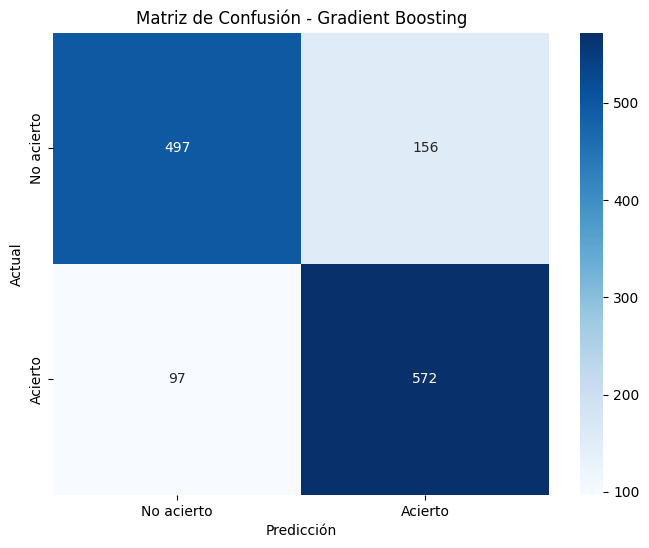

In [14]:
# Inicializar los modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'Bagging': BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42),
    'Pasting': BaggingClassifier(estimator=base_model, n_estimators=50, bootstrap=False, random_state=42)
}

# Evaluar los modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Para clasificación multiclase
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Visualizar la matriz de confusión para el mejor modelo
best_model_name = results_df['Accuracy'].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No acierto', 'Acierto'], 
            yticklabels=['No acierto', 'Acierto'])  
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title(f'Matriz de Confusión - {best_model_name}')
plt.show()